In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from tensorboard import summary
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
import torchvision, torch
print(torch.__version__)
torchvision.__version__

2.8.0+cu126


'0.23.0+cu126'

In [4]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"

In [5]:
from torchvision.models import resnet18, ResNet18_Weights

model_rn18 = resnet18(weights=ResNet18_Weights.DEFAULT).to(device)
model_rn18.eval()
print("Done")

Done


## Using the pre-trained models

Before using the pre-trained models, one must preprocess the image (resize with right resolution/interpolation, apply inference transforms, rescale the values etc). There is no standard way to do this as it depends on how a given model was trained. It can vary across model families, variants or even weight versions. Using the correct preprocessing method is critical and failing to do so may lead to decreased accuracy or incorrect outputs.

All the necessary information for the inference transforms of each pre-trained model is provided on its weights documentation. To simplify inference, TorchVision bundles the necessary preprocessing transforms into each model weight. These are accessible via the weight.transforms attribute

In [6]:
# Initialize the Weight Transforms
weights = ResNet18_Weights.DEFAULT
categories = weights.meta["categories"]
preprocess = weights.transforms()



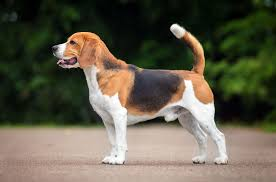

In [7]:
from PIL import Image
img = Image.open("images/dog_01.jpeg")
# img = Image.open("images/1_800px-Palazzocarignano.JPG")
img

In [8]:
# Apply it to the input image

img_transformed = preprocess(img).to(device)
img_transformed.shape

torch.Size([3, 224, 224])

In [9]:
predictions = None
with torch.inference_mode():
    pred = model_rn18(img_transformed.unsqueeze(0))
    print(pred.shape)
    # print(pred)
    predictions = pred

torch.Size([1, 1000])


In [10]:
cat_pred = categories[torch.argmax(pred)]
cat_pred

'English foxhound'

In [11]:
predictions.shape

torch.Size([1, 1000])

In [12]:
sum(predictions.squeeze().softmax(0))

tensor(1.0000, device='cuda:0')

In [13]:
from torchinfo import summary

summary(model=model_rn18,
        input_size=(4, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
        )


Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [4, 3, 224, 224]     [4, 1000]            --                   True
├─Conv2d (conv1)                         [4, 3, 224, 224]     [4, 64, 112, 112]    9,408                True
├─BatchNorm2d (bn1)                      [4, 64, 112, 112]    [4, 64, 112, 112]    128                  True
├─ReLU (relu)                            [4, 64, 112, 112]    [4, 64, 112, 112]    --                   --
├─MaxPool2d (maxpool)                    [4, 64, 112, 112]    [4, 64, 56, 56]      --                   --
├─Sequential (layer1)                    [4, 64, 56, 56]      [4, 64, 56, 56]      --                   True
│    └─BasicBlock (0)                    [4, 64, 56, 56]      [4, 64, 56, 56]      --                   True
│    │    └─Conv2d (conv1)               [4, 64, 56, 56]      [4, 64, 56, 56]      36,864               True
│    │    └─BatchN

In [14]:
model_rn18.fc

Linear(in_features=512, out_features=1000, bias=True)

In [15]:
for p in model_rn18.parameters():
    print(p.shape, p.requires_grad)

torch.Size([64, 3, 7, 7]) True
torch.Size([64]) True
torch.Size([64]) True
torch.Size([64, 64, 3, 3]) True
torch.Size([64]) True
torch.Size([64]) True
torch.Size([64, 64, 3, 3]) True
torch.Size([64]) True
torch.Size([64]) True
torch.Size([64, 64, 3, 3]) True
torch.Size([64]) True
torch.Size([64]) True
torch.Size([64, 64, 3, 3]) True
torch.Size([64]) True
torch.Size([64]) True
torch.Size([128, 64, 3, 3]) True
torch.Size([128]) True
torch.Size([128]) True
torch.Size([128, 128, 3, 3]) True
torch.Size([128]) True
torch.Size([128]) True
torch.Size([128, 64, 1, 1]) True
torch.Size([128]) True
torch.Size([128]) True
torch.Size([128, 128, 3, 3]) True
torch.Size([128]) True
torch.Size([128]) True
torch.Size([128, 128, 3, 3]) True
torch.Size([128]) True
torch.Size([128]) True
torch.Size([256, 128, 3, 3]) True
torch.Size([256]) True
torch.Size([256]) True
torch.Size([256, 256, 3, 3]) True
torch.Size([256]) True
torch.Size([256]) True
torch.Size([256, 128, 1, 1]) True
torch.Size([256]) True
torch.